In [305]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
%load_ext line_profiler
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (11,8)
from sklearn.ensemble import RandomForestRegressor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [306]:
from merf.utils import MERFDataGenerator
from merf.merf import MERF
from merf.evaluator import plot_training_stats

# Test Data Generation

In [307]:
dgm = MERFDataGenerator(m=.6, sigma_b=np.sqrt(4.5), sigma_e=1)

In [308]:
num_clusters_each_size = 20
train_sizes = [1, 3, 5, 7, 9]
known_sizes = [9, 27, 45, 63, 81]
new_sizes = [10, 30, 50, 70, 90]

In [309]:
# Smaller set that can be used for debugging
# num_clusters_each_size = 1
# train_sizes = [1, 3]
# known_sizes = [9, 27]
# new_sizes = [10, 30]

In [310]:
train_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(train_sizes, num_clusters_each_size)
known_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(known_sizes, num_clusters_each_size)
new_cluster_sizes = MERFDataGenerator.create_cluster_sizes_array(new_sizes, num_clusters_each_size)

In [311]:
len(train_cluster_sizes), len(known_cluster_sizes), len(new_cluster_sizes)

(100, 100, 100)

In [312]:
train, test_known, test_new, training_cluster_ids, ptev, prev = dgm.generate_split_samples(train_cluster_sizes, known_cluster_sizes, new_cluster_sizes)

INFO     [utils.py:165] Drew 10000 samples from 200 clusters.
INFO     [utils.py:166] PTEV = 90.03491536621449, PREV = 49.80610096609473.


In [313]:
len(train), len(test_known), len(test_new)

(500, 4500, 5000)

In [314]:
train.head()

,y,X_0,X_1,X_2,Z,cluster
0,1.467611,0.133135,0.635236,-1.290633,1.0,0
10,-2.019152,-0.230575,-0.988217,-0.684111,1.0,1
20,-0.897670,-0.611491,-0.593380,-0.378720,1.0,2
30,-0.083947,-1.359076,-0.631730,0.092139,1.0,3
40,0.908313,0.429150,0.636997,0.407117,1.0,4


# MERF Training

In [315]:
X_train = train[['X_0', 'X_1', 'X_2']]
Z_train = train[['Z']]
clusters_train = train['cluster']
y_train = train['y']

## Default MERF

In [316]:
mrf = MERF(max_iterations=30)
mrf.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:261] GLL is 54.59300169581048 at iteration 1.
INFO     [merf.py:261] GLL is 27.92696240335549 at iteration 2.
INFO     [merf.py:261] GLL is -17.10258209640814 at iteration 3.
INFO     [merf.py:261] GLL is -45.549066536957326 at iteration 4.
INFO     [merf.py:261] GLL is -42.29073865503014 at iteration 5.
INFO     [merf.py:261] GLL is -45.422293725010235 at iteration 6.
INFO     [merf.py:261] GLL is -47.835771063143184 at iteration 7.
INFO     [merf.py:261] GLL is -54.04466146147466 at iteration 8.
INFO     [merf.py:261] GLL is -49.61380640413496 at iteration 9.
INFO     [merf.py:261] GLL is -43.56258687239616 at iteration 10.
INFO     [merf.py:261] GLL is -30.696516926626273 at iteration 11.
INFO     [merf.py:261] GLL is -41.438557231500845 at iteration 12.
INFO     [merf.py:261] GLL is -41.350650942501034 at iteration 13.
INFO     [merf.py:261] GLL is -50.45943241040224 at iteration 14.
INFO     [merf.py:261] GLL is -44.88261810477473 at iteration 15.
INFO     [merf.

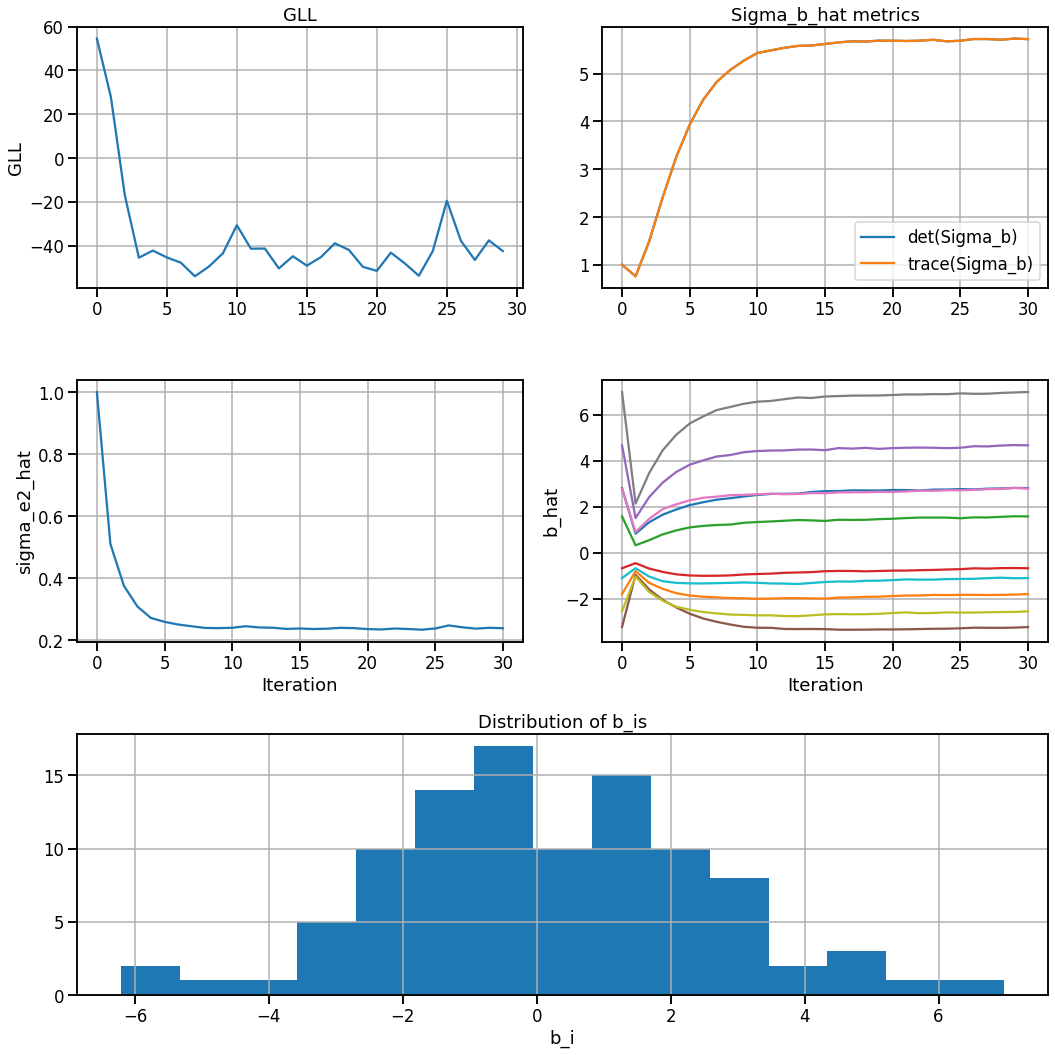

In [317]:
plot_training_stats(mrf, num_clusters_to_plot=10)

## LightGBM

In [318]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()

In [319]:
mrf_lgbm = MERF(lgbm, max_iterations=30)
mrf_lgbm.fit(X_train, Z_train, clusters_train, y_train)

INFO     [merf.py:261] GLL is 516.0300447705175 at iteration 1.
INFO     [merf.py:261] GLL is 400.76621698805826 at iteration 2.
INFO     [merf.py:261] GLL is 333.0337995767138 at iteration 3.
INFO     [merf.py:261] GLL is 294.0007896524033 at iteration 4.
INFO     [merf.py:261] GLL is 294.4411343793683 at iteration 5.
INFO     [merf.py:261] GLL is 286.94925785538123 at iteration 6.
INFO     [merf.py:261] GLL is 267.0151045801377 at iteration 7.
INFO     [merf.py:261] GLL is 272.3840546279733 at iteration 8.
INFO     [merf.py:261] GLL is 274.21810204529527 at iteration 9.
INFO     [merf.py:261] GLL is 274.826786338946 at iteration 10.
INFO     [merf.py:261] GLL is 278.2257672522123 at iteration 11.
INFO     [merf.py:261] GLL is 280.7936567608936 at iteration 12.
INFO     [merf.py:261] GLL is 281.1432723650517 at iteration 13.
INFO     [merf.py:261] GLL is 282.0431723236306 at iteration 14.
INFO     [merf.py:261] GLL is 271.7581801939329 at iteration 15.
INFO     [merf.py:261] GLL is 27

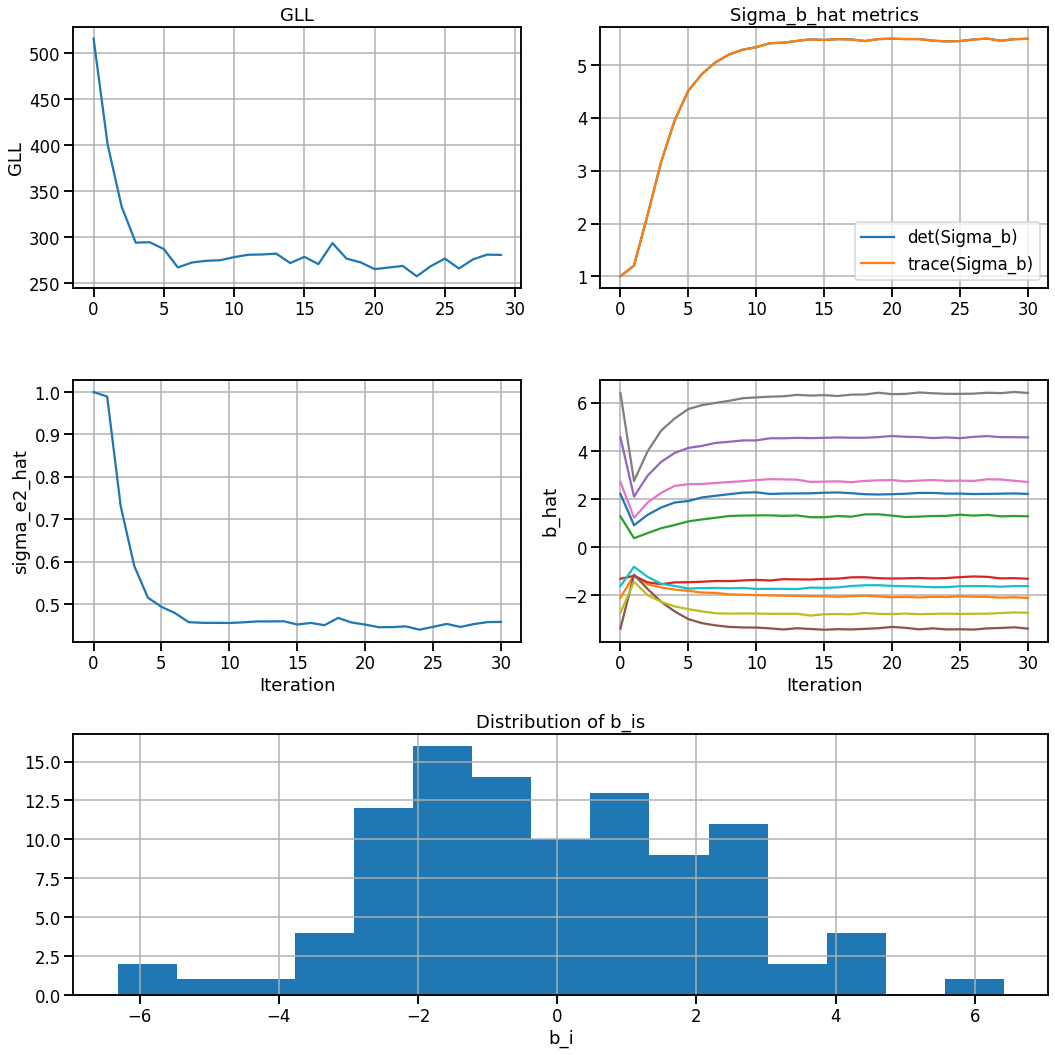

In [320]:
plot_training_stats(mrf_lgbm, num_clusters_to_plot=10)

# MERF Prediction

In [321]:
X_known = test_known[['X_0', 'X_1', 'X_2']]
Z_known = test_known[['Z']]
clusters_known = test_known['cluster']
y_known = test_known['y']

In [322]:
y_hat_known = mrf.predict(X_known, Z_known, clusters_known)
y_hat_known

array([2.84268247, 1.85203947, 2.6007508 , ..., 3.49492302, 2.71621082,
       4.64021406])

In [323]:
assert len(y_hat_known) == len(y_known)

In [324]:
X_new = test_new[['X_0', 'X_1', 'X_2']]
Z_new = test_new[['Z']]
clusters_new = test_new['cluster']
y_new = test_new['y']

In [325]:
y_hat_new = mrf.predict(X_new, Z_new, clusters_new)
y_hat_new

array([2.15021046, 2.53198837, 2.09549374, ..., 0.43302719, 3.55778436,
       4.23779162])

In [326]:
assert len(y_hat_new) == len(y_new)

# Inspect Trained Random Forest

Specifically look at the partial dependence plots and feature importance (using SHAP). 

In [301]:
mrf.trained_fe_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [302]:
from sklearn.inspection import plot_partial_dependence

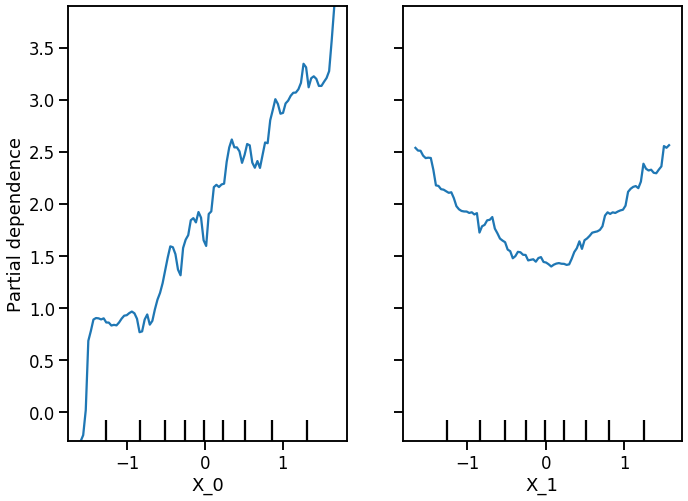

In [303]:
features = [0, 1]
plot_partial_dependence(mrf.trained_fe_model, X_known, features) 

In [304]:
import shap

In [135]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(mrf.trained_fe_model)
shap_values = explainer.shap_values(X_known)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


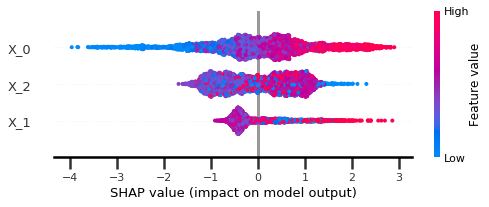

In [136]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_known)

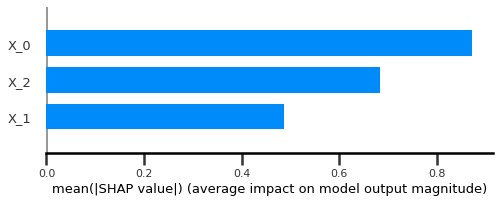

In [137]:
shap.summary_plot(shap_values, X_known, plot_type="bar")


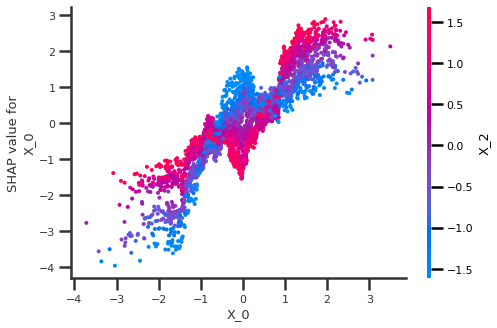

In [138]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('X_0', shap_values, X_known)

# MERF vs. Random Forest on Fixed Effects

In [ ]:
# Train and test using classic random forest. 
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_hat_known_rf = rf.predict(X_known)

In [ ]:
pmse_known_rf = np.mean((y_known - y_hat_known_rf) ** 2)
pmse_known_rf

In [ ]:
y_hat_known_merf = mrf.predict(X_known, Z_known, clusters_known)

In [ ]:
pmse_known_merf = np.mean((y_known - y_hat_known_merf) ** 2)
pmse_known_merf

In [ ]:
rd_known = 100 * (pmse_known_rf - pmse_known_merf) / pmse_known_rf
rd_known

In [ ]:
y_hat_new_rf = rf.predict(X_new)

In [ ]:
pmse_new_rf = np.mean((y_new - y_hat_new_rf) ** 2)
pmse_new_rf

In [ ]:
y_hat_new_merf = mrf.predict(X_new, Z_new, clusters_new)

In [ ]:
pmse_new_merf = np.mean((y_new - y_hat_new_merf) ** 2)
pmse_new_merf

In [ ]:
rd_new = 100 * (pmse_new_rf - pmse_new_merf) / pmse_new_rf
rd_new

# MERF vs Random Forest with OHE Cluster Ids

In [ ]:
rf_ohe = RandomForestRegressor(n_estimators=300, n_jobs=-1)

In [ ]:
categories = np.sort(clusters_train.unique())

In [ ]:
clusters_train_prime = pd.Categorical(clusters_train, categories=categories)

In [ ]:
X_ohe = pd.get_dummies(clusters_train_prime, prefix='cluster')

In [ ]:
X_ohe.head()

In [ ]:
X_train_ohe = pd.merge(X_train, X_ohe, left_index=True, right_index=True)

In [ ]:
rf_ohe.fit(X_train_ohe, y_train)

In [ ]:
clusters_known_prime = pd.Categorical(clusters_known, categories=categories)

In [ ]:
X_known_ohe = pd.get_dummies(clusters_known_prime, prefix='cluster')

In [ ]:
X_known_ohe.head()

In [ ]:
X_known_w_ohe = pd.merge(X_known, X_known_ohe, left_index=True, right_index=True)

In [ ]:
y_hat_known_rf_ohe = rf_ohe.predict(X_known_w_ohe)

In [ ]:
mse_known_rf_ohe = np.mean((y_known - y_hat_known_rf_ohe) ** 2)
mse_known_rf_ohe

In [ ]:
clusters_new_prime = pd.Categorical(clusters_new, categories=categories)

In [ ]:
X_new_ohe = pd.get_dummies(clusters_new_prime, prefix='cluster')

In [ ]:
X_new_ohe.head()

In [ ]:
X_new_w_ohe = pd.merge(X_new, X_new_ohe, left_index=True, right_index=True)

In [ ]:
y_hat_new_rf_ohe = rf_ohe.predict(X_new_w_ohe)

In [ ]:
mse_new_rf_ohe = np.mean((y_new - y_hat_new_rf_ohe) ** 2)
mse_new_rf_ohe